In [68]:
import glob
import pylab
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy. stats import norm
from scipy.stats import shapiro
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [ ]:
glob.glob('tennis_atp/atp_matches_[12][019][0126789]*')

In [70]:
tennis_data = pd.concat([pd.read_csv(i) for i in glob.glob('tennis_atp/atp_matches_[12][019][0126789]*')], axis=0)

In [71]:
tennis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188167 entries, 0 to 2915
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          188167 non-null  object 
 1   tourney_name        188167 non-null  object 
 2   surface             185850 non-null  object 
 3   draw_size           188167 non-null  int64  
 4   tourney_level       188167 non-null  object 
 5   tourney_date        188167 non-null  int64  
 6   match_num           188167 non-null  int64  
 7   winner_id           188167 non-null  int64  
 8   winner_seed         69731 non-null   object 
 9   winner_entry        16249 non-null   object 
 10  winner_name         188167 non-null  object 
 11  winner_hand         188151 non-null  object 
 12  winner_ht           171866 non-null  float64
 13  winner_ioc          188157 non-null  object 
 14  winner_age          186678 non-null  float64
 15  loser_id            188167 non-null 

In [72]:
tennis_data.describe()

,draw_size,tourney_date,match_num,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,best_of,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,188167.000000,1.881670e+05,188167.000000,188167.000000,171866.000000,186678.000000,188167.000000,159399.000000,183029.000000,188167.000000,...,92098.000000,92098.000000,92098.000000,92099.000000,92098.000000,92098.000000,153255.000000,106054.000000,144923.000000,104470.000000
mean,52.934978,1.993350e+07,76.615607,103845.154219,184.452870,25.654760,104996.117677,184.231338,25.702824,3.441714,...,47.975385,31.874308,14.981661,12.191034,4.808563,8.737019,75.206649,1366.004375,112.763143,859.118608
std,36.443864,1.544359e+05,110.714484,11569.779008,6.663069,4.039017,14948.980822,6.651290,4.177894,0.830342,...,19.361001,14.436054,7.219240,4.125992,3.272386,4.127056,120.972986,1725.502462,162.010978,986.624340
min,2.000000,1.968011e+07,1.000000,100001.000000,160.000000,14.300000,100001.000000,160.000000,14.400000,1.000000,...,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,32.000000,1.980041e+07,10.000000,100403.000000,180.000000,22.700000,100506.000000,180.000000,22.700000,3.000000,...,34.000000,22.000000,10.000000,9.000000,2.000000,6.000000,17.000000,489.000000,37.000000,362.000000
50%,32.000000,1.993030e+07,25.000000,101701.000000,185.000000,25.200000,101843.000000,185.000000,25.300000,3.000000,...,45.000000,29.000000,14.000000,11.000000,4.000000,8.000000,44.000000,846.000000,70.000000,630.000000
75%,64.000000,2.006072e+07,80.000000,103900.000000,188.000000,28.200000,104254.500000,188.000000,28.300000,3.000000,...,58.000000,40.000000,19.000000,15.000000,7.000000,11.000000,86.000000,1530.000000,118.000000,1013.000000
max,128.000000,2.022113e+07,1701.000000,211468.000000,211.000000,58.700000,211573.000000,211.000000,63.600000,5.000000,...,328.000000,284.000000,101.000000,91.000000,28.000000,38.000000,2101.000000,16950.000000,2159.000000,16950.000000


### _ЗАДАНИЕ 1_

Вы хотите узнать, как много значит ранг игрока в теннисе. Проверьте следующие утверждения:

**а)** Если ранг игрока выше более, чем на 20 позиций, то в среднем он будет выигрывать с большей вероятностью. (Если хотите проверить статистически — формируйте выборку как отклонение от ожидаемого количества побед при случайном исходе);


In [73]:
tennis_data.isna().sum()

tourney_id                 0
tourney_name               0
surface                 2317
draw_size                  0
tourney_level              0
tourney_date               0
match_num                  0
winner_id                  0
winner_seed           118436
winner_entry          171918
winner_name                0
winner_hand               16
winner_ht              16301
winner_ioc                10
winner_age              1489
loser_id                   0
loser_seed            152775
loser_entry           160487
loser_name                 0
loser_hand                62
loser_ht               28768
loser_ioc                 66
loser_age               5138
score                      8
best_of                    0
round                      0
minutes                98657
w_ace                  96068
w_df                   96069
w_svpt                 96069
w_1stIn                96069
w_1stWon               96069
w_2ndWon               96069
w_SvGms                96068
w_bpSaved     

In [74]:
tennis_data = tennis_data.dropna(subset=['winner_rank', 'loser_rank'])
tennis_data = tennis_data.reset_index(drop=True)

In [75]:
tennis_copy = tennis_data.copy()
tennis_copy.shape

(141083, 49)

In [76]:
# Если ранг игрока выше более, чем на 20 позиций.
tennis_copy['collumn_for_task_a'] = (tennis_copy['winner_rank'] - tennis_copy['loser_rank']) > 20


In [77]:
rank20_df = tennis_data[tennis_copy['collumn_for_task_a']]

# Группировка по победителям, когда ранг игрока выше более, чем на 20 позиций.
win20 = rank20_df.groupby(['winner_name'])['tourney_id'].count().reset_index()
win20 = win20.rename(columns={'winner_name': 'name', 'tourney_id': 'win'})


# Группировка по проигравшим, когда ранг игрока выше более, чем на 20 позиций.
los20 = rank20_df.groupby(['loser_name'])['tourney_id'].count().reset_index()
los20 = los20.rename(columns={'loser_name': 'name', 'tourney_id': 'loss'})

rank20_df = win20.merge(los20, left_on='name', right_on='name')

# Строим новую колонку с долей побед, ранг игрока выше которого более, чем на 20 позиций.
rank20_df['total_games'] = rank20_df['loss'] + rank20_df['win']
rank20_df['winrate_percent'] = (rank20_df['win']/rank20_df['total_games']) * 100

In [78]:
# Группировка по победителям в общем.
winners_for_task_a = tennis_copy.groupby(['winner_name'])['tourney_id'].count().reset_index()
winners_for_task_a = winners_for_task_a.rename(columns={'winner_name': 'name', 'tourney_id': 'win'})


# Группировка по проигравшим в общем.
losers_for_task_a = tennis_copy.groupby(['loser_name'])['tourney_id'].count().reset_index()
losers_for_task_a = losers_for_task_a.rename(columns={'loser_name': 'name', 'tourney_id': 'loss'})

tennis_copy = winners_for_task_a.merge(losers_for_task_a, left_on='name', right_on='name')

# Строим новую колонку с долей побед в общем.
tennis_copy['total_games'] = tennis_copy['loss'] + tennis_copy['win']
tennis_copy['winrate_percent'] = (tennis_copy['win']/tennis_copy['total_games']) * 100

<AxesSubplot: xlabel='winrate_percent', ylabel='Count'>

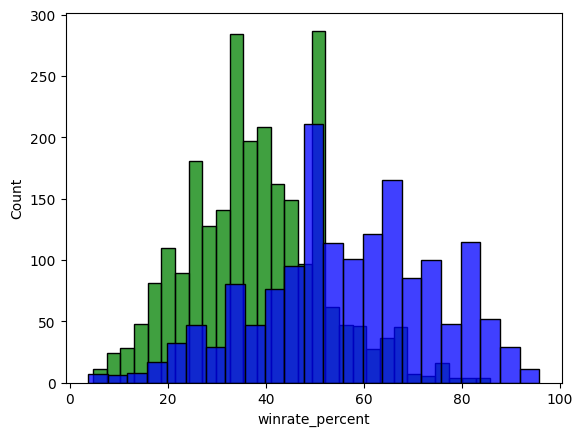

In [79]:
# зеленым цветом показано количество наблюдейний в целом.
sns.histplot(data=tennis_copy['winrate_percent'], stat='count', color='green')

# синим цветом показано количество наблюдений, когда ранг игрока выше более, чем на 20 позиций.
sns.histplot(data=rank20_df['winrate_percent'], stat='count', color='blue')

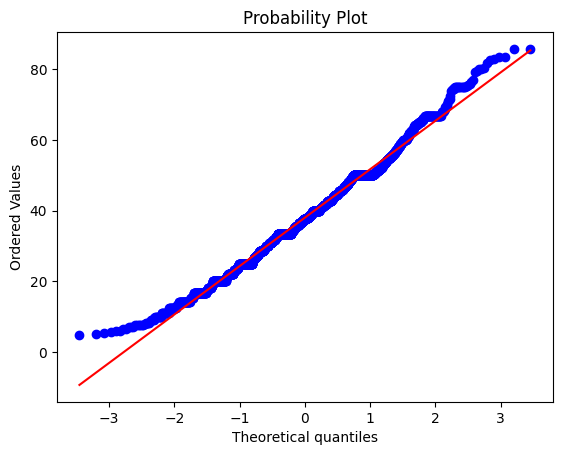

In [80]:
stats.probplot(tennis_copy['winrate_percent'], dist="norm", plot=pylab);

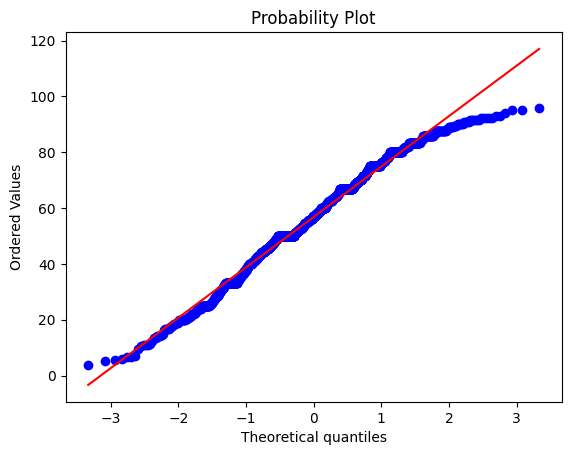

In [81]:
stats.probplot(rank20_df['winrate_percent'], dist="norm", plot=pylab);

#### Очевидно, что распределение ненормальное _(но хотя чуть-чуть похоже на "нормальное")_
Чтобы убедиться в этом используем тест Андерсона-Дарлинга.
Тест проверяет, имеет ли выборка данных распределение по Гауссу.

H0: выборка имеет распределение по Гауссу.

H1: выборка не имеет распределения по Гауссу.

In [82]:
from scipy.stats import anderson

def anderson_result(df: pd.DataFrame):
    result = anderson(df)
    print('stat=%.3f' % (result.statistic))
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print('Probably Gaussian at the %.1f%% level' % (sl))
        else:
            print('Probably not Gaussian at the %.1f%% level' % (sl))

In [83]:
# Проверяем нормальность распределения для всех
anderson_result(tennis_copy['winrate_percent'])

stat=5.083
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [84]:
# Проверяем нормальность распределения, когда ранг игрока выше более, чем на 20 позиций.
anderson_result(rank20_df['winrate_percent'])

stat=4.542
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


<AxesSubplot: ylabel='winrate_percent'>

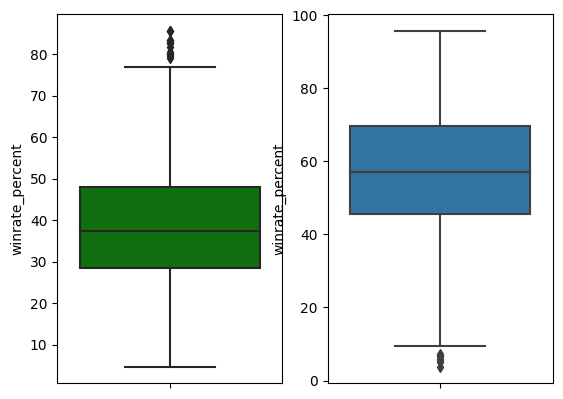

In [85]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=tennis_copy, y='winrate_percent', ax=axes[0], color='g')
sns.boxplot(data=rank20_df, y='winrate_percent', ax=axes[1])

#### Боксплот выше подтверждает, что вероятность выигрыша выше в группе с разницей в ранге.
Так же посмотрим на значение _p-value_ используя normaltest из библиотеки **scipy**

In [86]:
from scipy.stats import normaltest
stat, p = normaltest(rank20_df['winrate_percent'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=34.704, p=0.000


In [87]:
stat, p = normaltest(tennis_copy['winrate_percent'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=31.919, p=0.000


**H0**: Средняя вероятность победы в группах с большой разницей в ранге и в общей группе существенно не отличается.

**H1**: Если ранг победителя на 20 пунктов выше ранга проигравшего, значит, процент выигрыша выше, чем в обратном случае.

**_Мы можем отвергнуть нулевую гипотезу так как наше p-value р<0,05._**

__________________________________________________________________________________________________________

**б)** Если ранг игрока находится в окне +-5 позиций, то вероятность победы будет значительно отличаться от гипотезы из предыдущего случая. Для проверки статистической значимости выборку можно сделать как среднее по годам (например, с 1980 по 2022г.). Подумайте, как правильно сформировать репрезентативную выборку.

In [88]:

# Если ранг игрока находится в окне +-5 позиций.
tennis_copy2 = tennis_data.copy()
tennis_copy2['collumn_for_task_b'] = abs(tennis_copy2['winner_rank'] - tennis_copy2['loser_rank']) <= 5

rank5_df = tennis_data[tennis_copy2['collumn_for_task_b']]

# Группировка по победителям, когда ранг игрока выше более, чем на 20 позиций.
win5 = rank5_df.groupby(['winner_name'])['tourney_id'].count().reset_index()
win5 = win5.rename(columns={'winner_name': 'name', 'tourney_id': 'win'})


# Группировка по проигравшим, когда ранг игрока выше более, чем на 20 позиций.
los5 = rank5_df.groupby(['loser_name'])['tourney_id'].count().reset_index()
los5 = los5.rename(columns={'loser_name': 'name', 'tourney_id': 'loss'})

rank5_df = win5.merge(los5, left_on='name', right_on='name')

# Строим новую колонку с долей побед, ранг игрока выше которого более, чем на 20 позиций.
rank5_df['total_games'] = rank5_df['loss'] + rank5_df['win']
rank5_df['winrate_percent'] = (rank5_df['win']/rank5_df['total_games']) * 100

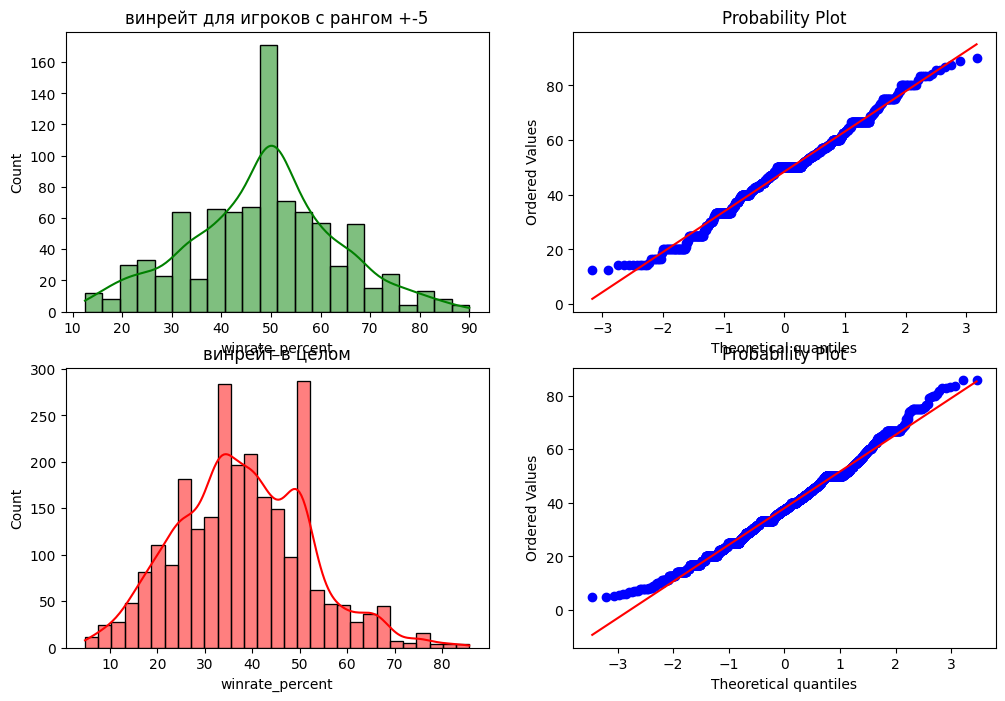

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(rank5_df['winrate_percent'], ax=axes[0][0], kde=True, color='g')
sns.histplot(tennis_copy['winrate_percent'], ax=axes[1][0], kde=True, color='r')
axes[0][0].set_title('винрейт для игроков с рангом +-5')
axes[1][0].set_title('винрейт в целом')
stats.probplot(rank5_df['winrate_percent'], dist="norm", plot=axes[0][1]);
stats.probplot(tennis_copy['winrate_percent'], dist="norm", plot=axes[1][1]);

**H0:** если разница в рангах в пределах -5 очков, значит процент выигрыша не ниже, чем в случае большей разницы в рангах.

**H1:** если разница в рангах в пределах -5 очков, значит процент выигрыша ниже, чем при большей разнице рангов.

Видно, что для случая **"+- 5 рангов"** распределение похоже на нормальное. Проверим это.

In [90]:
anderson_result(rank5_df['winrate_percent'])

stat=4.081
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


#### оказалось, что распределение ненормальное

теперь проверим нашу нулевую гипотезу

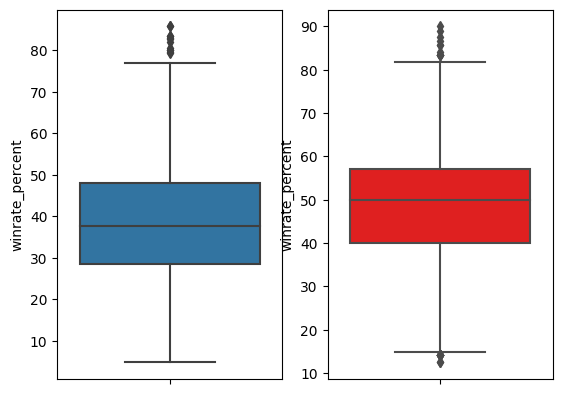

In [91]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=tennis_copy, y='winrate_percent', ax=axes[0])
sns.boxplot(data=rank5_df, y='winrate_percent', ax=axes[1], color='r');

In [92]:
stat, p = normaltest(rank5_df['winrate_percent'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.117, p=0.943


#### H0 отклоняется, поскольку p<0,05.

# Задание 2

Правда ли, что среднее количество сетов, которое необходимо любому игроку для победы в матче, сокращается со временем? Разбейте данные на две группы — с 1980 до 2001 гг. и 2002-2022 гг. Как изменилось среднее количество сетов, которое победитель затратил на игру? Является ли разница средних этих двух выборок статистически значимой? Выбор статистического теста обоснуйте.

In [93]:
df_for_second_task = tennis_data.copy()

df_for_second_task.tourney_date.apply(lambda x: '%.0f' % round(x, 0))
df_for_second_task.loc[:, 'tourney_date'] = pd.to_datetime(df_for_second_task['tourney_date'], format='%Y%m%d', errors='coerce')

In [94]:
df_foo = df_for_second_task.loc[df_for_second_task['score'].map(lambda x: type(x) is str)].copy()
df_foo['num_of_sets'] = df_foo['score'].map(lambda x: len(x.split()))

In [95]:
# Среднее количество сетов, которые победитель затратил на игру
df_foo = df_foo[['num_of_sets']].groupby(df_foo['tourney_date'].dt.year).mean().reset_index()

In [96]:
# делим на две группы

group_before_2001 = df_foo[(df_foo['tourney_date']>1979) & (df_foo['tourney_date']<2002)]
group_after_2001 = df_foo[(df_foo['tourney_date']>2001) & (df_foo['tourney_date']<2023)]

<AxesSubplot: xlabel='num_of_sets', ylabel='Count'>

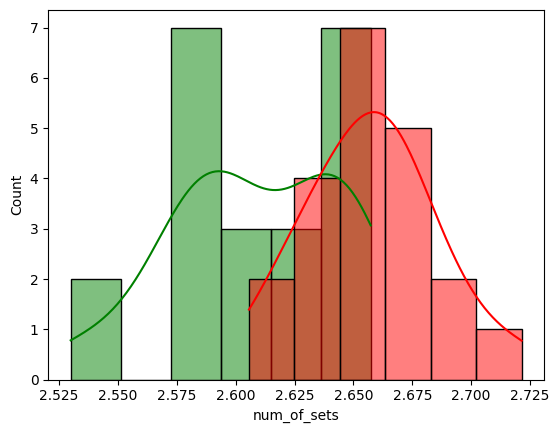

In [97]:
sns.histplot(data=group_before_2001['num_of_sets'], stat='count', color='g', kde=True)
sns.histplot(data=group_after_2001['num_of_sets'], stat='count', color='r', kde=True)

**H0:** среднее количество наборов одинаково за два периода (1980-2001 гг. по сравнению с 2002-2022 гг.)

**H1:** среднее количество наборов больше в 1980-2001 гг., чем в 2002-2022 гг.

In [98]:
p = stats.mannwhitneyu(group_before_2001['num_of_sets'], group_after_2001['num_of_sets'])[1]
print(f'\nMann-Whitney test: p = {p}')


Mann-Whitney test: p = 4.2407427852631385e-05


In [99]:
stat, p = normaltest(group_before_2001['num_of_sets'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=1.089, p=0.580


In [100]:
stat, p = normaltest(group_after_2001['num_of_sets'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.494, p=0.781


#### Вывод:
**Н0** не отвергается, так как р>0,05.

Среднее количество наборов одинаково в двух периодах (1980-2001 гг. против 2002-2022 гг.).

# ЗАДАНИЕ 3

У вас появились сомнения — не является ли результат, который вы посчитали на предыдущем шаге, некорректным. Кажется, что на это мог повлиять формат самого матча — best of 3 или best of 5. Оставьте только матчи best of 5 (колонка best_of) и определите — является ли разница среднего количества сетов, которое сыграл победитель, значимой для выборок матчей по 1980 до 2001 гг. и 2002-2022 гг. Выбор статистического теста обоснуйте.

In [101]:
df_for_third_task = tennis_data.copy()

df_for_third_task.tourney_date.apply(lambda x: '%.0f' % round(x, 0))
df_for_third_task.loc[:, 'tourney_date'] = pd.to_datetime(df_for_third_task['tourney_date'], format='%Y%m%d', errors='coerce')

In [102]:
best_of_five_df = df_for_third_task[df_for_third_task['best_of'] == 5]
best_of_five_df = best_of_five_df.dropna(subset=['score'])

# Получаем число сетов.
best_of_five_df['numbers_of_sets'] = best_of_five_df['score'].map(lambda x: len(x.split()))

# Получаем среднее числа сетов
best_of_five_df = best_of_five_df[['numbers_of_sets']].groupby(best_of_five_df['tourney_date'].dt.year).mean().reset_index()

In [103]:
# Снова делим на две группы.

group_before_2001 = best_of_five_df[(best_of_five_df['tourney_date']>1979) & (best_of_five_df['tourney_date']<2002)]
group_after_2001 = best_of_five_df[(best_of_five_df['tourney_date']>2001) & (best_of_five_df['tourney_date']<2023)]

<AxesSubplot: xlabel='numbers_of_sets', ylabel='Count'>

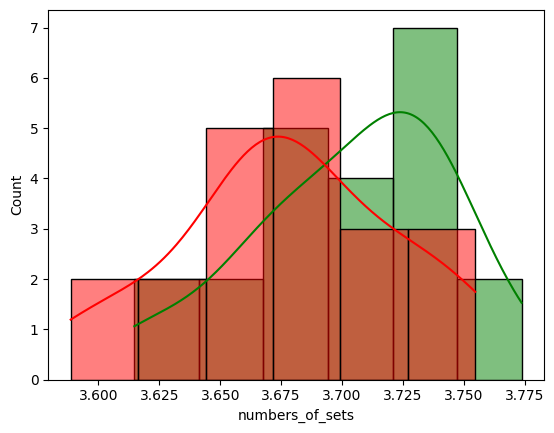

In [104]:
sns.histplot(data=group_before_2001['numbers_of_sets'], stat='count', color='g', kde=True)
sns.histplot(data=group_after_2001['numbers_of_sets'], stat='count', color='r', kde=True)

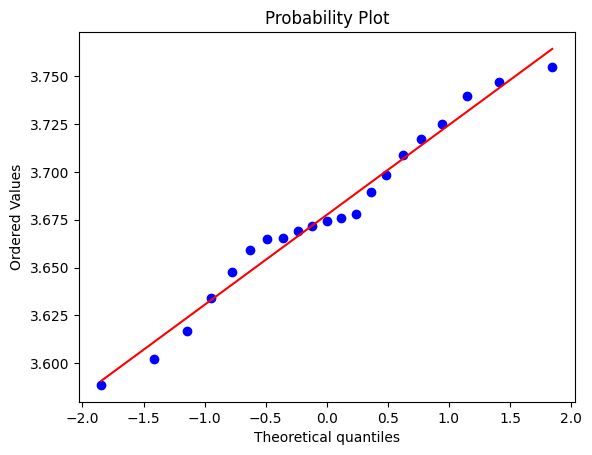

In [105]:
stats.probplot(group_after_2001['numbers_of_sets'], dist="norm", plot=pylab);

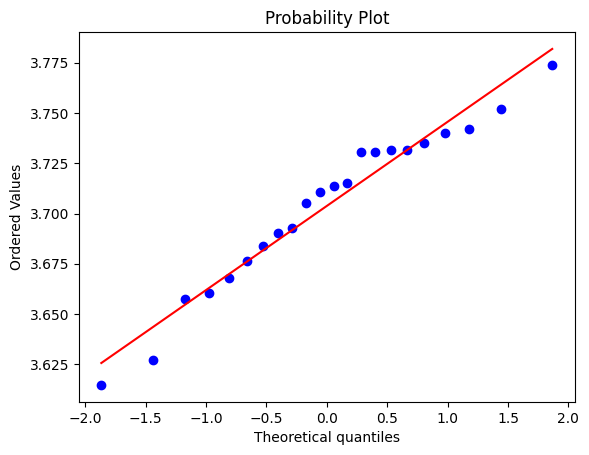

In [106]:
stats.probplot(group_before_2001['numbers_of_sets'], dist="norm", plot=pylab);

In [107]:
# Так же для сравнения групп используем критерий Манна-Уитни
# (независимые выборки и распределения, отличные от нормального).

stats.mannwhitneyu(group_before_2001['numbers_of_sets'], group_after_2001['numbers_of_sets'])

MannwhitneyuResult(statistic=309.0, pvalue=0.05970349425159471)

#### Вывод:

**Н0** не отвергается, так как р>0,05.

Среднее количество наборов одинаково в разные периоды.

_______________________________________________________
## Задание 4

Вы хотите изучить психологическую устойчивость профессиональных игроков в теннис. Одним из важных показателей такой устойчивости будет доля выигранных брейк-поинтов. Возьмите трех игроков (они необязательно должны играть в одно и то же время. Можете взять игроков, которые сильно отличаются по рангу, а можете взять примерно равных игроков), для каждого из них посчитайте долю выигранных брейк поинтов (колонки, заканчивающиеся на bpFaced и bpSaved) отдельно в победных и проигранных матчах за минимум 10 лет (можно больше, но годы должны идти подряд). Постройте box-plot’ы для этих статистик для каждого из игроков. Являются ли эти распределения по годам (по победным и по проигранным матчам) независимыми для каждого из игроков? Если сравнивать эту статистику между игроками — будет ли разница в средних для проигранных и выигранных матчей значимой попарно между всеми игроками? Выбор статистического теста обоснуйте.

In [108]:
df_fourth_task = tennis_data.copy()

df_fourth_task['win_bpSaved_percent'] = (df_fourth_task['w_bpSaved'] / (df_fourth_task['w_bpFaced'] + df_fourth_task['w_bpSaved'])) * 100
df_fourth_task['lose_bpSaved_percent'] = (df_fourth_task['l_bpSaved'] / (df_fourth_task['l_bpFaced'] + df_fourth_task['l_bpSaved'])) * 100

In [109]:
df_Federer_win = df_fourth_task[df_fourth_task['winner_name'] == 'Roger Federer']
df_Federer_los = df_fourth_task[df_fourth_task['loser_name'] == 'Roger Federer']
     
df_Lendl_win = df_fourth_task[df_fourth_task['winner_name'] == 'Ivan Lendl']
df_Lendl_los = df_fourth_task[df_fourth_task['loser_name'] == 'Ivan Lendl']
     
df_Connors_win = df_fourth_task[df_fourth_task['winner_name'] == 'Jimmy Connors']
df_Connors_los = df_fourth_task[df_fourth_task['loser_name'] == 'Jimmy Connors']

In [ ]:
def drop_nan_by_feature(df, feature):
    df.dropna(subset=[feature], inplace=True)


drop_nan_by_feature(df_Federer_win, 'win_bpSaved_percent')
drop_nan_by_feature(df_Federer_los, 'lose_bpSaved_percent')

drop_nan_by_feature(df_Lendl_win, 'win_bpSaved_percent')
drop_nan_by_feature(df_Lendl_los, 'lose_bpSaved_percent')

drop_nan_by_feature(df_Connors_win, 'win_bpSaved_percent')
drop_nan_by_feature(df_Connors_los, 'lose_bpSaved_percent')

**H0:** среднее количество выигрышных брейкпойнтов одинаково как в выигрышных, так и в проигрышных играх

**H1:** среднее количество выигрышных брейкпойнтов больше в выигрышных играх, чем в проигрышных

In [111]:
def create_compare_boxplot(df1: pd.DataFrame, df2:pd.DataFrame):
    fig, axes = plt.subplots(1, 2)
    sns.boxplot(data=df1, y='win_bpSaved_percent', ax=axes[0], color='green')
    sns.boxplot(data=df2, y='lose_bpSaved_percent', ax=axes[1], color='red')

In [112]:
def get_p_value_mannwhitneyu(df1, df2):
    p = stats.mannwhitneyu(df1, df2)[1]
    print('p=%.3f'%(p))

p=0.000


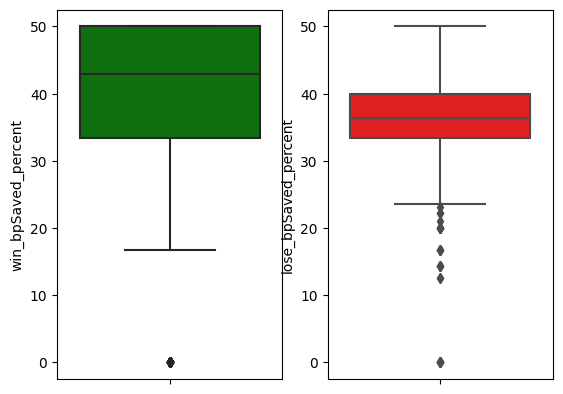

In [113]:
create_compare_boxplot(df_Federer_win, df_Federer_los)
get_p_value_mannwhitneyu(df_Federer_win['win_bpSaved_percent'],df_Federer_los['lose_bpSaved_percent'])

##### Вывод для Roger Federer:

**H0** отклонена, поскольку p<0,05.

Среднее количество выигрышных брейкпойнтов выше в выигрышных играх, чем в проигрышных.


_Чем больше брейкпойнтов было выиграно в игре, тем выше вероятность выиграть эту игру._

p=0.000


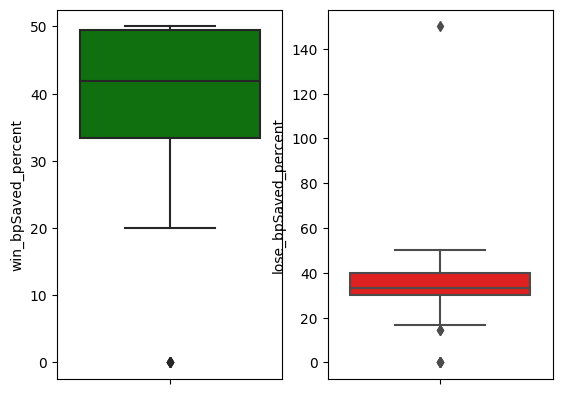

In [114]:
create_compare_boxplot(df_Lendl_win, df_Lendl_los)
get_p_value_mannwhitneyu(df_Lendl_win['win_bpSaved_percent'],df_Lendl_los['lose_bpSaved_percent'])

##### Вывод для Ivan Lendl:

**H0** отклонена, поскольку p<0,05.

Среднее количество выигрышных брейкпойнтов выше в выигрышных играх, чем в проигрышных.


_Чем больше брейкпойнтов было выиграно в игре, тем выше вероятность выиграть эту игру._

p=0.000


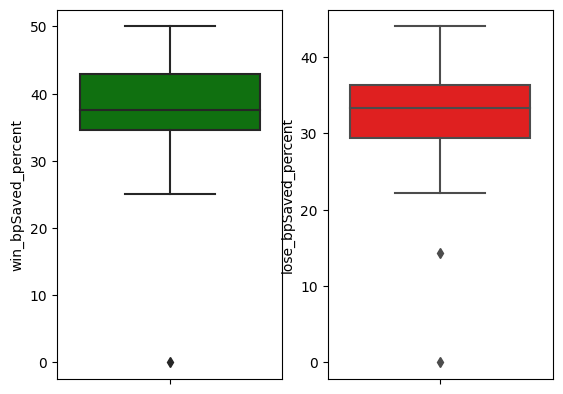

In [115]:
create_compare_boxplot(df_Connors_win, df_Connors_los)
get_p_value_mannwhitneyu(df_Connors_win['win_bpSaved_percent'],df_Connors_los['lose_bpSaved_percent'])

##### Вывод для Jimmy Connors:

**H0** отклонена, поскольку p<0,05.

Среднее количество выигрышных брейкпойнтов выше в выигрышных играх, чем в проигрышных.


_Чем больше брейкпойнтов было выиграно в игре, тем выше вероятность выиграть эту игру._

In [116]:
def histogram_win_lose_compare(df1, df2):
    fig, axes = plt.subplots(1, 2)
    sns.histplot(df1, ax=axes[0], stat='count', color='g', kde=True);
    sns.histplot(df2, ax=axes[1], stat='count', color='r', kde=True);

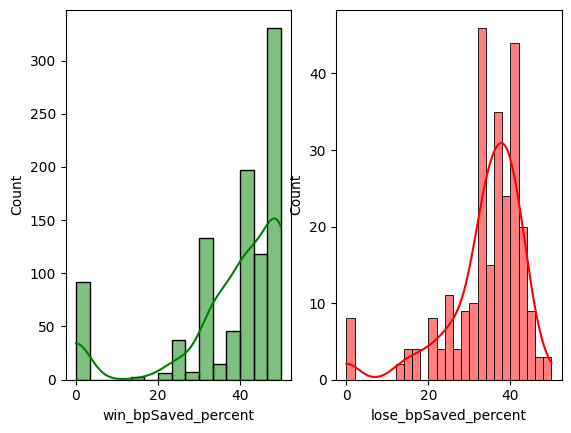

In [117]:
histogram_win_lose_compare(df_Federer_win['win_bpSaved_percent'], df_Federer_los['lose_bpSaved_percent'])

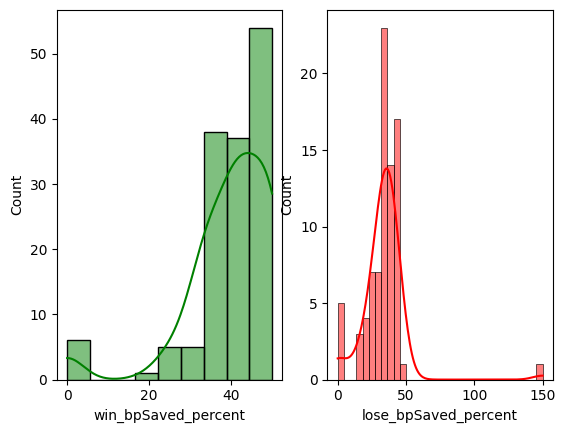

In [118]:
histogram_win_lose_compare(df_Lendl_win['win_bpSaved_percent'], df_Lendl_los['lose_bpSaved_percent'])

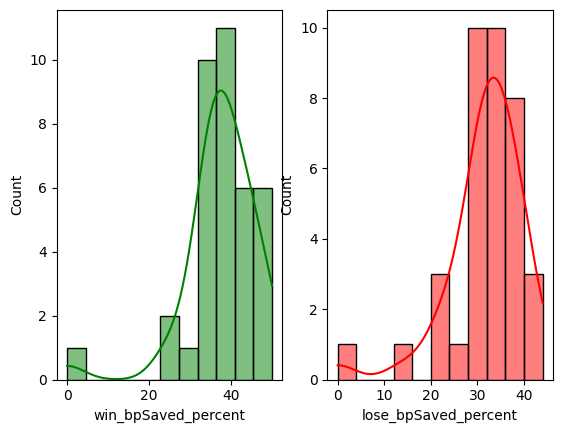

In [119]:
histogram_win_lose_compare(df_Connors_win['win_bpSaved_percent'], df_Connors_los['lose_bpSaved_percent'])

In [120]:
def compare_boxploats_by_feature(df1, df2, df3, feature):
    fig, axes = plt.subplots(1, 3)
    sns.boxplot(data=df1, y= feature, ax=axes[0], color='green')
    sns.boxplot(data=df2, y= feature, ax=axes[1], color='red')
    sns.boxplot(data=df3, y= feature, ax=axes[2], color='blue')

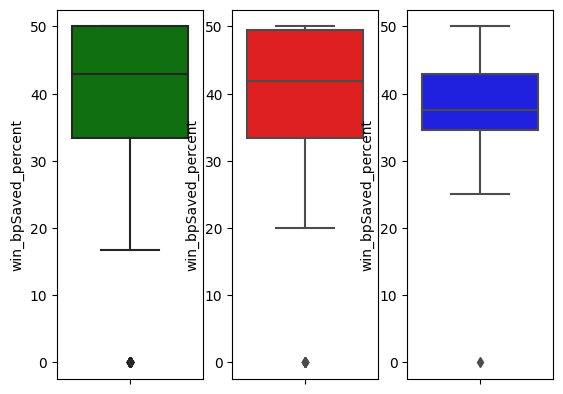

In [121]:
compare_boxploats_by_feature(df_Federer_win, df_Lendl_win, df_Connors_win, 'win_bpSaved_percent')

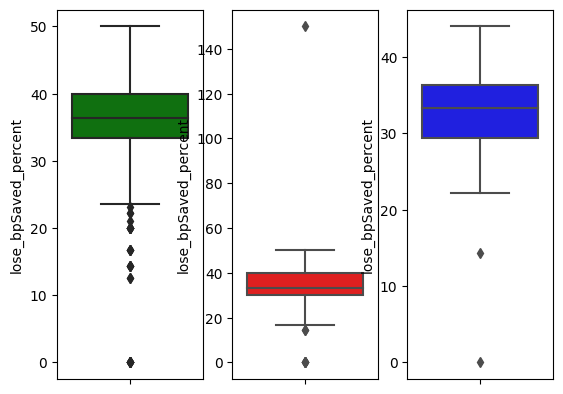

In [122]:
compare_boxploats_by_feature(df_Federer_los, df_Lendl_los, df_Connors_los, 'lose_bpSaved_percent')

#### Вывод:

У игроков есть совместные матчи, но их количество невелико.

Данные выборки можно считать независимыми. Среднее количество точек брейкпоинтов распределено **ненормально**.

### Задание 5

У вас есть гипотеза, что доля выигранных брейк-поинтов связана с вероятностью победить в игре. Соберите статистику, где для каждого матча будет собран его исход (победа/поражение) и доля выигранных брейк-поинтов (не забудьте, что в матче два игрока). Разделите долю выигранных брейкпоинтов на группы выше/ниже медианы и, используя информацию о исходе матча, проверьте зависимость между количеством выигранных брейкпоинтов и результатом матча. Насколько сильна эта зависимость? Выбор статистического теста обоснуйте.


In [123]:
df_fifth_task = df_fourth_task.copy()

losers = pd.concat([(df_fifth_task['lose_bpSaved_percent']).reset_index(drop=True), pd.Series(np.zeros_like(df_fifth_task['l_bpSaved']), name='win')], axis=1)
losers = losers.rename(columns={'lose_bpSaved_percent': 'bp'})


winners = pd.concat([(df_fifth_task['win_bpSaved_percent']).reset_index(drop=True), pd.Series(np.ones_like(df_fifth_task['w_bpSaved']), name='win')], axis=1)
winners = winners.rename(columns={'win_bpSaved_percent': 'bp'})


break_point_games = pd.concat([losers,winners])
break_point_games = break_point_games.dropna()
break_point_games['win'].value_counts()


0.0    91233
1.0    83314
Name: win, dtype: int64

**H0:** среднее количество выигрышных брейкпойнтов равно, между выигрышными и проигрышными играми.

**H1:** среднее количество выигрышных брейкпойнтов больше в выигрышных играх, чем в проигрышных.

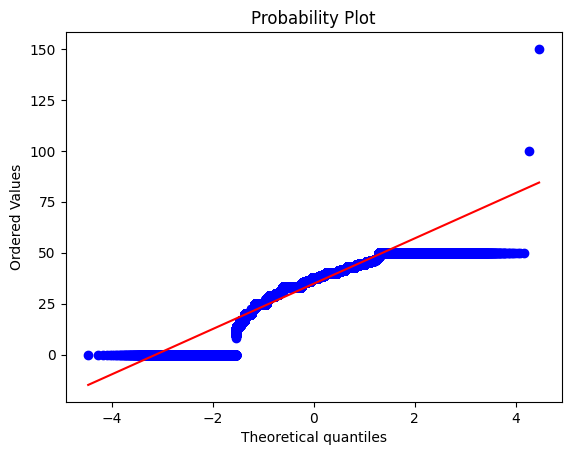

In [124]:
stats.probplot(break_point_games['bp'], dist="norm", plot=pylab);

<AxesSubplot: xlabel='bp', ylabel='Count'>

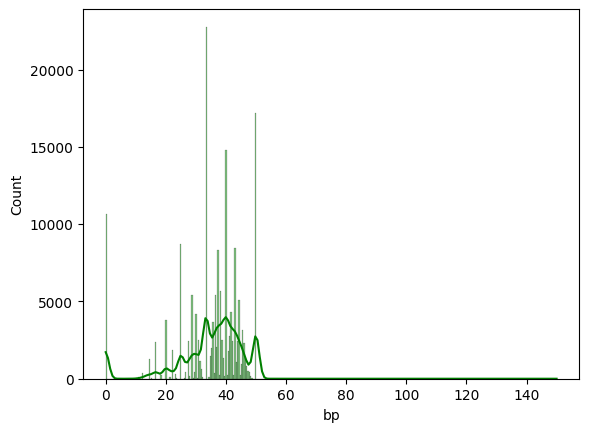

In [125]:
sns.histplot(data=break_point_games['bp'], stat='count', color='g', kde=True)

<AxesSubplot: xlabel='win', ylabel='bp'>

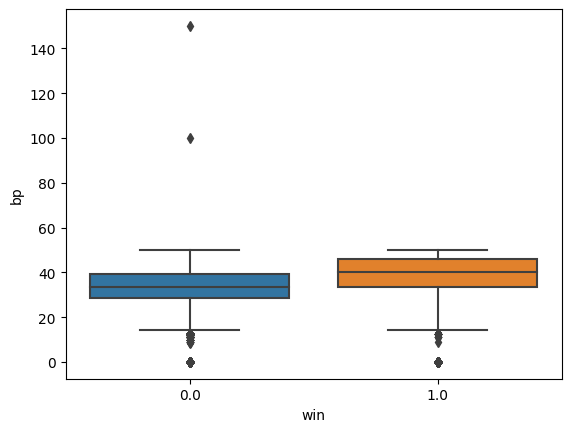

In [126]:
sns.boxplot(data=break_point_games, x='win', y='bp')

In [127]:
# Обработка выбросов.
mean_mu = break_point_games['bp'].mean()
sigma = break_point_games['bp'].std()

lower_bound = mean_mu - 3*sigma
upper_bound = mean_mu + 3*sigma

cleaned_break_point_games = break_point_games[(break_point_games['bp']>lower_bound) & (break_point_games['bp']<upper_bound)]


<AxesSubplot: xlabel='win', ylabel='bp'>

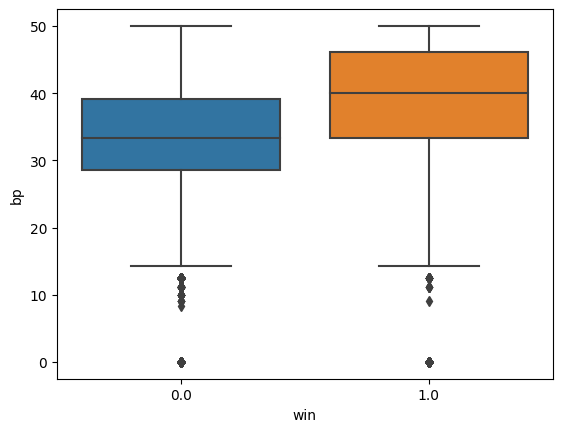

In [128]:
sns.boxplot(data=cleaned_break_point_games, x='win', y='bp')

In [129]:
shapiro(break_point_games['bp'])

C:\Users\supat\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8632503747940063, pvalue=0.0)

##### Вывод
**H0** отклонена, поскольку p<0,05.

Среднее количество выигрышных брейкпойнтов выше в выигрышных играх, чем в проигрышных.

In [130]:
# Разделим на две группы по медиане


cleaned_break_point_games['above_median'] = cleaned_break_point_games['bp'] > cleaned_break_point_games['bp'].median()

groups_by_median = pd.crosstab(cleaned_break_point_games['win'].astype(bool),
            cleaned_break_point_games['above_median'])


C:\Users\supat\AppData\Local\Temp\ipykernel_12948\3856233454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_break_point_games['above_median'] = cleaned_break_point_games['bp'] > cleaned_break_point_games['bp'].median()


##### В этом случае мы можем использовать критерий хи-квадрат.
Эта функция вычисляет статистику хи-квадрат и значение p для проверки гипотезы о независимости наблюдаемых частот в таблице непредвиденных обстоятельств.

In [131]:
chi2 = stats.chi2_contingency(groups_by_median, correction=False)
print(f'Статистика теста: {chi2[0]}, P-значение теста: {chi2[1]}')

Статистика теста: 15923.017985857976, P-значение теста: 0.0


##### Вывод:

Нулевую гепотизу можно отклонить, поскольку p<0,05.

Количество выигрышных и проигрышных брейкпойнтов в выигрышных и проигрышных играх неодинаково. 

______
##### Чтобы определить силу связи между переменными, мы можем использовать V статистику Крамера.

In [132]:
n = np.sum(groups_by_median).sum()

shape_min = (min(groups_by_median.shape) - 1)
cramer = np.sqrt((chi2[0] / n) / shape_min)

cramer

0.3020361922761225

### V Статистика Крамера = 0.302036
Это значит, что между процентом выигранных брейк-пойнтов и количеством побед - сильная связь.

Значит, чем больше брейкпойнтов было выиграно в игре, тем выше вероятность выиграть эту игру.